In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
microsoft_df = pd.read_csv("Microsoft_Stock.csv")

In [17]:
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'])
microsoft_df.set_index('Date',inplace=True)
microsoft_df.drop(columns=['Open','High','Low','Volume'],inplace=True)
microsoft_df

,Close
Date,
2015-04-01 16:00:00,40.72
2015-04-02 16:00:00,40.29
2015-04-06 16:00:00,41.55
2015-04-07 16:00:00,41.53
2015-04-08 16:00:00,41.42
...,...
2021-03-25 16:00:00,232.34
2021-03-26 16:00:00,236.48
2021-03-29 16:00:00,235.24


### We will use Date and Close column for Time-series Analysis

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Close Stock Price')

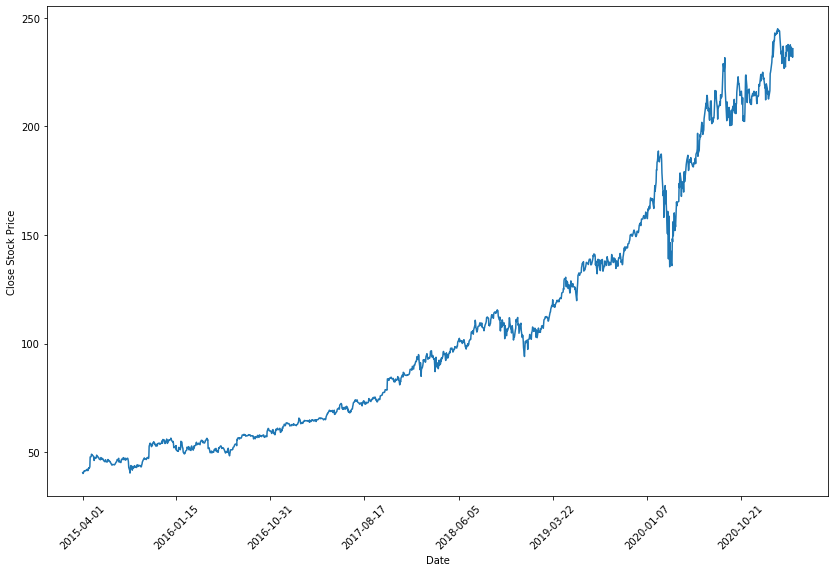

In [6]:
plt.plot(microsoft_df['Close'])
x = microsoft_df.index
plt.xticks(x[::200],rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Stock Price')

### Descriptive statistics

In [7]:
microsoft_df.describe()

,Close
count,1511.000000
mean,107.422091
std,56.702299
min,40.290000
25%,57.855000
50%,93.860000
75%,138.965000
max,244.990000


In [8]:
microsoft_df.isnull().sum()

Close    0
dtype: int64

### Time-series decomposition: Seasonality, Trend, Noise

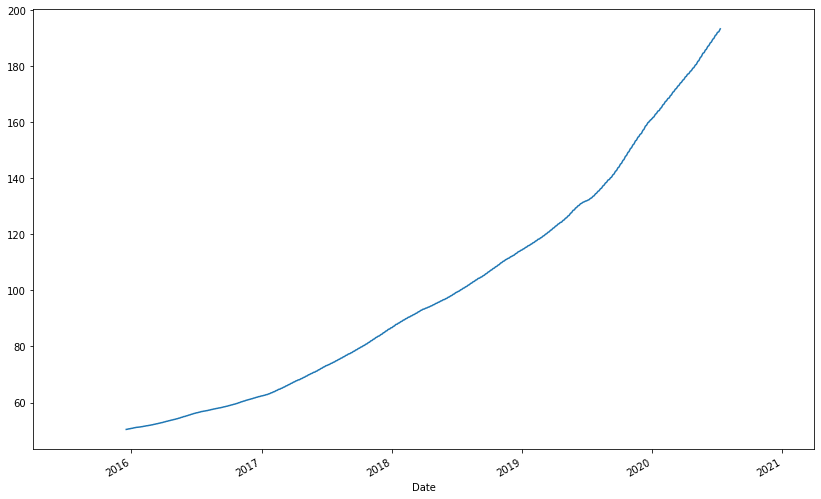

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

result = seasonal_decompose(microsoft_df,period=365)
result.trend.plot()
plt.show()

### A clear trend exists in the data.